In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics

In [8]:
df_train=pd.read_csv("Dataset/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.shape

(891, 12)

In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_train.Sex.value_counts()

In [27]:
df_train=df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


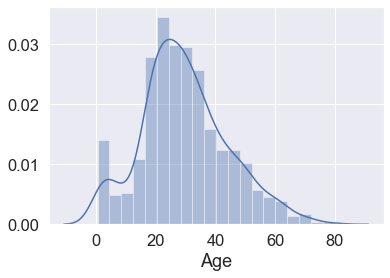

In [42]:
sns.distplot(df_train['Age'].loc[df_train['Age'].notnull()])

In [44]:
#as graph is left skewed, used median instead of mode to replace null values

    

In [46]:
df_train.groupby(['Pclass']).agg({'Age':'mean'})

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [51]:
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [52]:
df_train['Age']=df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [53]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [54]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [55]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [56]:
df_train_dummied=pd.get_dummies(df_train,columns=['Sex'])

In [57]:
df_train_dummied=pd.get_dummies(df_train_dummied,columns=['Embarked'])

In [58]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


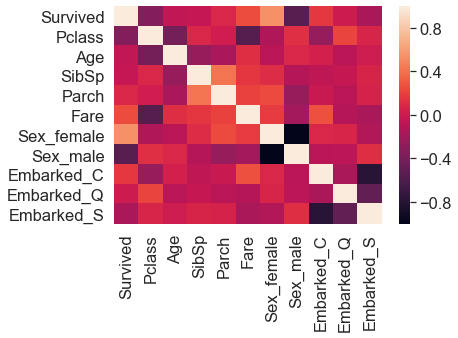

In [59]:
#Find if variables are coorealated
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [60]:
df_train_dummied.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [63]:
used_features=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X=df_train_dummied[used_features].values
Y=df_train_dummied['Survived']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [77]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((622, 10), (267, 10), (622,), (267,))

In [67]:
LogReg=LogisticRegression()
LogReg.fit(x_train,y_train)

C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_pred=LogReg.predict(x_test)

In [83]:
y_test.value_counts()

0    166
1    101
Name: Survived, dtype: int64

In [87]:
# not survived: 166-25: 141 (out of the total 166 non survived , the alg correctly predicted 141)
#survived: 101-22: 79(out of the total 101 non survived , the alg correctly predicted 79)
metrics.confusion_matrix(y_test,y_pred)

array([[141,  25],
       [ 22,  79]], dtype=int64)

In [82]:
#algorithm has an accuracy of 85%: out of 100 passangers , the algo predicts 85 correctly
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.8239700374531835
0.7596153846153846
0.7707317073170732
0.7821782178217822


In [81]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       166
           1       0.76      0.78      0.77       101

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.81       267
weighted avg       0.83      0.82      0.82       267



In [85]:
print(LogReg.intercept_)
print(used_features,LogReg.coef_)

[1.63848304]
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] [[-0.88098398 -0.03355661 -0.23738336 -0.04886841  0.00204378  1.99377503
  -0.35529199  0.90883588  0.45746809  0.27217908]]


In [86]:
#further check algorithms predicted  probability : col1: not Survived, col2: Survived 
LogReg.predict_proba(x_test)

array([[0.27667794, 0.72332206],
       [0.38487458, 0.61512542],
       [0.93597091, 0.06402909],
       [0.28379632, 0.71620368],
       [0.93969693, 0.06030307],
       [0.15185655, 0.84814345],
       [0.33680151, 0.66319849],
       [0.52273141, 0.47726859],
       [0.78463159, 0.21536841],
       [0.40006114, 0.59993886],
       [0.7372405 , 0.2627595 ],
       [0.21843738, 0.78156262],
       [0.76008951, 0.23991049],
       [0.17302831, 0.82697169],
       [0.85932439, 0.14067561],
       [0.36740967, 0.63259033],
       [0.87685557, 0.12314443],
       [0.30432763, 0.69567237],
       [0.19276034, 0.80723966],
       [0.42506523, 0.57493477],
       [0.88553553, 0.11446447],
       [0.58916164, 0.41083836],
       [0.85792683, 0.14207317],
       [0.93373338, 0.06626662],
       [0.51766599, 0.48233401],
       [0.49012993, 0.50987007],
       [0.046322  , 0.953678  ],
       [0.86301137, 0.13698863],
       [0.89065205, 0.10934795],
       [0.34133929, 0.65866071],
       [0.